In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow.keras.layers as tfl
import tensorflow as tf
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [60]:
Train = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
Test = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [61]:
y_train = np.array(Train['label']).reshape(27455,1)
y_test= np.array(Test['label']).reshape(7172,1)
x_train= Train.drop('label',axis=1)
x_test= Test.drop('label', axis=1)

In [62]:
# preparing X data (examples stacked in rows)
x_train = x_train/255
x_test= x_test/255
x_train =np.reshape(np.array(x_train), (27455, 28,28,1))
x_test = np.reshape(np.array(x_test), (7172, 28,28,1))
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)

x_train shape: (27455, 28, 28, 1)
x_test shape: (7172, 28, 28, 1)


In [63]:
# Preparing Y data (row for each example)
print('y_train shape before one hot encoding:',y_train.shape)
print('y_test shape before one hot encoding:',y_test.shape)

def y_reshape(m, y):
    Y_coded = np.zeros((m,26))
    for i in range(m):
        label = y[i,0]
        Y_coded[i,label]=1
    return Y_coded

y_test = y_reshape(7172, y_test)
y_train = y_reshape(27455, y_train)
print('y_train shape after one hot encoding:',y_train.shape)
print('y_test shape after one hot encoding:',y_test.shape)  

y_train shape before one hot encoding: (27455, 1)
y_test shape before one hot encoding: (7172, 1)
y_train shape after one hot encoding: (27455, 26)
y_test shape after one hot encoding: (7172, 26)


In [76]:
# Construct Model
def convolutional_model(input_size):
    input = tf.keras.Input(shape=input_size)
    Z1 = tfl.Conv2D(filters=8, kernel_size=4, strides=(1,1), padding = 'same')(input)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8,8), strides=(8,8), padding='same')(A1)
    Z2 = tfl.Conv2D(filters=16, kernel_size=2, strides=(1,1), padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4,4), strides=(2,2), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=26, activation='softmax')(F)
    model = tf.keras.Model(inputs= input, outputs=outputs)
    return model
conv_model = convolutional_model((28,28,1))
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 8)         136       
_________________________________________________________________
re_lu_11 (ReLU)              (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 16)          528       
_________________________________________________________________
re_lu_12 (ReLU)              (None, 4, 4, 16)          0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 16)          0   

In [77]:
# Training & Testing Model
train_dataset_batches = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
test_dataset_batches = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)
history = conv_model.fit(train_dataset_batches, epochs=100, validation_data=test_dataset_batches)
# loss & accuracy -> for training data while val_loss & val_accuracy -> for validation set

Epoch 1/100


2023-01-14 14:02:58.929587: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


429/429 [==============================] - 3s 6ms/step - loss: 3.0394 - accuracy: 0.1229 - val_loss: 2.6306 - val_accuracy: 0.2154
Epoch 2/100
429/429 [==============================] - 3s 6ms/step - loss: 2.1398 - accuracy: 0.3738 - val_loss: 1.8344 - val_accuracy: 0.4098
Epoch 3/100
429/429 [==============================] - 3s 6ms/step - loss: 1.5920 - accuracy: 0.5211 - val_loss: 1.5378 - val_accuracy: 0.4927
Epoch 4/100
429/429 [==============================] - 3s 6ms/step - loss: 1.2899 - accuracy: 0.6044 - val_loss: 1.3567 - val_accuracy: 0.5396
Epoch 5/100
429/429 [==============================] - 3s 7ms/step - loss: 1.0975 - accuracy: 0.6594 - val_loss: 1.2379 - val_accuracy: 0.5704
Epoch 6/100
429/429 [==============================] - 3s 6ms/step - loss: 0.9615 - accuracy: 0.6993 - val_loss: 1.1509 - val_accuracy: 0.5938
Epoch 7/100
429/429 [==============================] - 3s 6ms/step - loss: 0.8566 - accuracy: 0.7302 - val_loss: 1.0784 - val_accuracy: 0.6251
Epoch 8/100

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

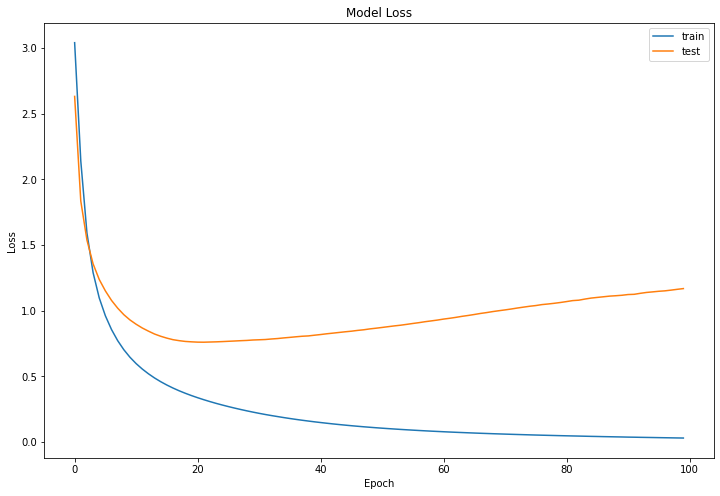

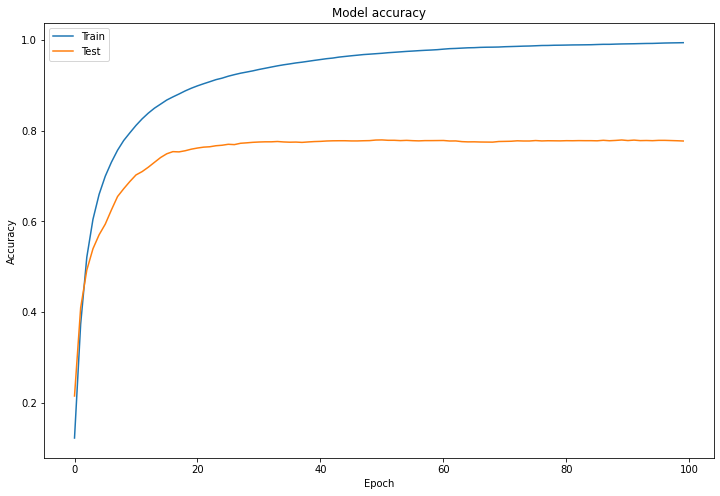

In [82]:
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[['loss', 'val_loss']]
df_loss.rename(columns={'loss':'train', 'val_loss':'test'}, inplace=True)
df_acc= df_loss_acc[['accuracy', 'val_accuracy']]
df_acc.rename(columns={'accuracy':'Train','val_accuracy':'Test'},inplace=True)
df_loss.plot(title='Model Loss', figsize=(12,8)).set(xlabel='Epoch', ylabel='Loss')
df_acc.plot(title='Model accuracy', figsize=(12,8)).set(xlabel='Epoch', ylabel='Accuracy')

In [105]:
train_acc = conv_model.evaluate(x_train,y_train)[1]
test_acc = conv_model.evaluate(x_test, y_test)[1]
test_pred = np.argmax(conv_model.predict(x_test), axis=1)
test_pred = y_reshape(7172,test_pred.reshape(7172,1))

225/225 [==============================] - 1s 3ms/step - loss: 1.1684 - accuracy: 0.7769


In [110]:
print("Precision: ", precision_score(y_test, test_pred, average="micro").round(2))
print("Recall: ", recall_score(y_test, test_pred, average="micro").round(2))
print("F1 Score: ", f1_score(y_test, test_pred, average="micro").round(2))

Precision:  0.78
Recall:  0.78
F1 Score:  0.78


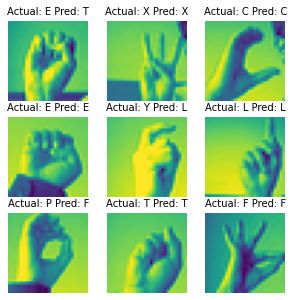

In [122]:
sign_map = ['A','B','C', 'D', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M', 'N', 'O','P', 'Q', 'R', 'S', 'T', 'U', 'V','W', 'X', 'Y', 'Z']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(5,5))
for ax in axs.reshape(-1):
    idx = np.random.randint(7172)
    pred = int(np.argmax(test_pred[idx]))
    ax.set_title("Actual: "+sign_map[np.argmax(y_test[idx])]+" Pred: "+sign_map[pred], size=10)
    ax.axis('off')
    ax.imshow(x_test[idx]);